<a href="https://colab.research.google.com/github/samikshakamdi/WageWise-Salary-Prediction/blob/main/WageWise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit pyngrok scikit-learn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/adult 3.csv")
df

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

In [ ]:
df.head(2)

age workclass  fnlwgt education  educational-num      marital-status  \
0   25   Private  226802      11th                7       Never-married   
1   38   Private   89814   HS-grad                9  Married-civ-spouse   

          occupation relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black   Male             0             0   
1    Farming-fishing      Husband  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K

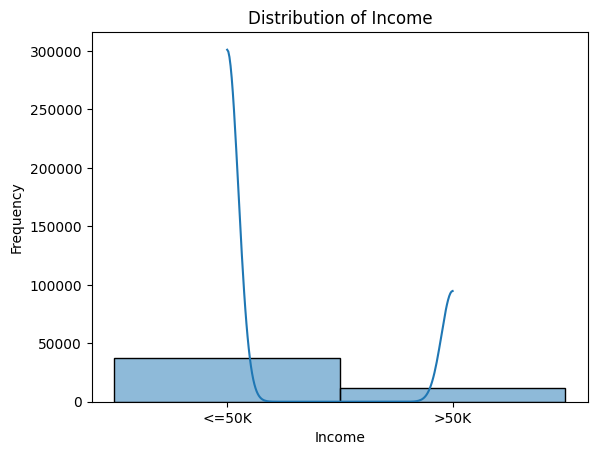

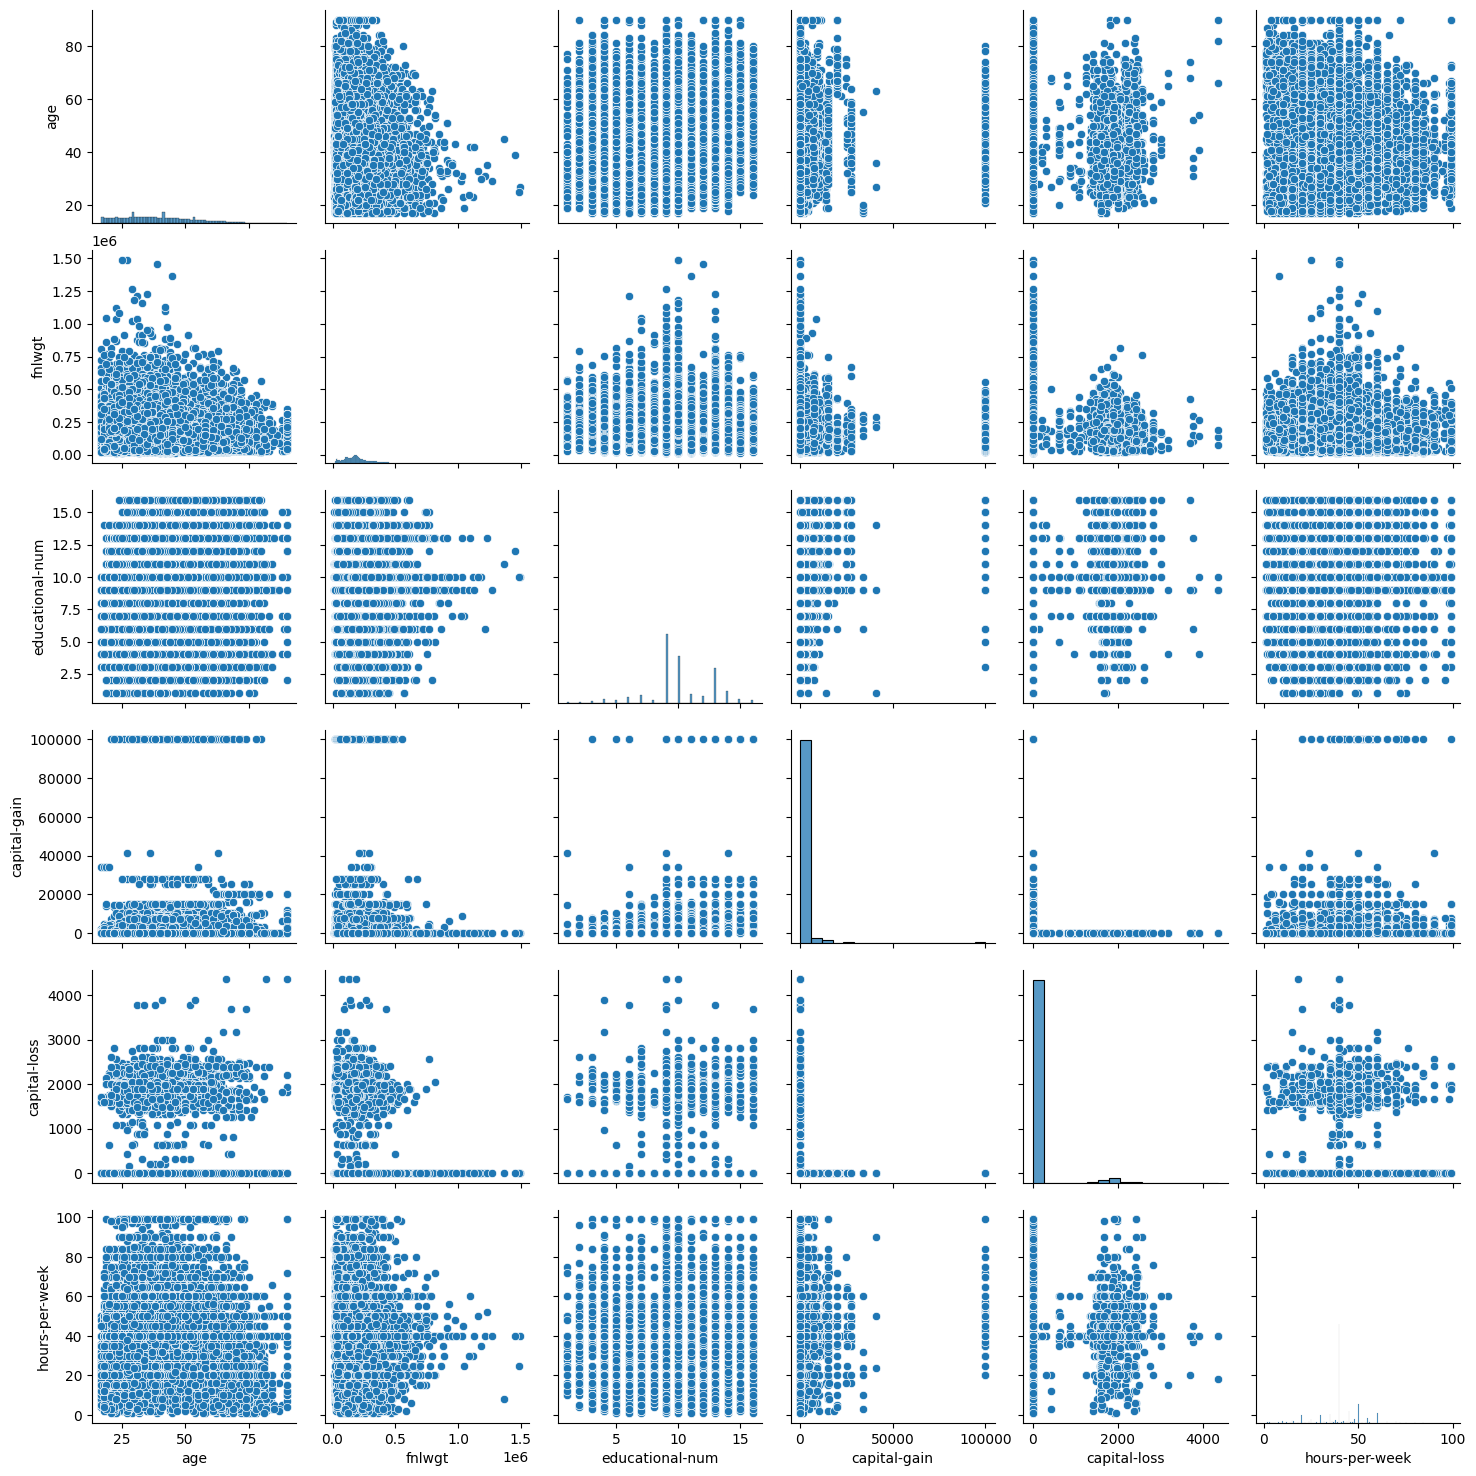

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['income'], kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

sns.pairplot(df)

In [ ]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
print(df['income'].unique())

['<=50K' '>50K']


In [ ]:
print(df['income'].unique())

['<=50K' '>50K']


In [ ]:
print(df.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [ ]:
df.workclass.replace({'?':'Others'},inplace=True)
print(df['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


/tmp/ipython-input-1271393163.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.workclass.replace({'?':'Others'},inplace=True)


In [ ]:
df=df[df["workclass"]!='Without-pay']
df=df[df['workclass']!='Never-worked']
print(df['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [ ]:
print(df['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6111
Exec-managerial      6085
Adm-clerical         5608
Sales                5503
Other-service        4921
Machine-op-inspct    3020
?                    2799
Transport-moving     2354
Handlers-cleaners    2070
Farming-fishing      1482
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [ ]:
df.occupation.replace({'?':'Others'},inplace=True)
print(df['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6111
Exec-managerial      6085
Adm-clerical         5608
Sales                5503
Other-service        4921
Machine-op-inspct    3020
Others               2799
Transport-moving     2354
Handlers-cleaners    2070
Farming-fishing      1482
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-2918883568.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.occupation.replace({'?':'Others'},inplace=True)


In [ ]:
df=df[df['occupation']!='Armed-Forces']
print(df['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6111
Exec-managerial      6085
Adm-clerical         5608
Sales                5503
Other-service        4921
Machine-op-inspct    3020
Others               2799
Transport-moving     2354
Handlers-cleaners    2070
Farming-fishing      1482
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Name: count, dtype: int64


In [ ]:
print(df['education'].value_counts())

education
HS-grad         15763
Some-college    10869
Bachelors        8024
Masters          2655
Assoc-voc        2060
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       833
9th               756
12th              656
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [ ]:
df = df.drop('education', axis=1)

In [ ]:
df.head(2)

age workclass  fnlwgt  educational-num      marital-status  \
0   25   Private  226802                7       Never-married   
1   38   Private   89814                9  Married-civ-spouse   

          occupation relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black   Male             0             0   
1    Farming-fishing      Husband  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K

In [ ]:
print(df['educational-num'].value_counts())

educational-num
9     15763
10    10869
13     8024
14     2655
11     2060
7      1809
12     1599
6      1387
4       952
15      833
5       756
8       656
16      594
3       509
2       247
1        83
Name: count, dtype: int64


In [ ]:
print(df['fnlwgt'].value_counts())

fnlwgt
203488    21
120277    19
125892    18
190290    18
126569    18
          ..
256956     1
32668      1
419721     1
34935      1
285290     1
Name: count, Length: 28502, dtype: int64


In [ ]:
print(df['capital-gain'].value_counts())

capital-gain
0        44764
15024      513
7688       410
7298       363
99999      244
         ...  
6612         1
1111         1
22040        1
1639         1
2387         1
Name: count, Length: 123, dtype: int64


In [ ]:

print(df['capital-gain'].value_counts())

capital-gain
0        44764
15024      513
7688       410
7298       363
99999      244
         ...  
6612         1
1111         1
22040        1
1639         1
2387         1
Name: count, Length: 123, dtype: int64


In [ ]:
print(df['hours-per-week'].value_counts())

hours-per-week
40    22786
50     4242
45     2716
60     2175
35     1934
      ...  
79        1
94        1
87        1
69        1
82        1
Name: count, Length: 96, dtype: int64


In [ ]:
print(df['native-country'].value_counts())

native-country
United-States                 43788
Mexico                          951
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

In [ ]:
df['native-country'].replace({'?':'Others'},inplace=True)
print(df['native-country'].value_counts())

native-country
United-States                 43788
Mexico                          951
Others                          856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

/tmp/ipython-input-3600220576.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['native-country'].replace({'?':'Others'},inplace=True)


In [ ]:
df=df.drop(['relationship', 'race', 'gender', 'marital-status'], axis=1)
df.head(2)

age workclass  fnlwgt  educational-num         occupation  capital-gain  \
0   25   Private  226802                7  Machine-op-inspct             0   
1   38   Private   89814                9    Farming-fishing             0   

   capital-loss  hours-per-week native-country income  
0             0              40  United-States  <=50K  
1             0              50  United-States  <=50K

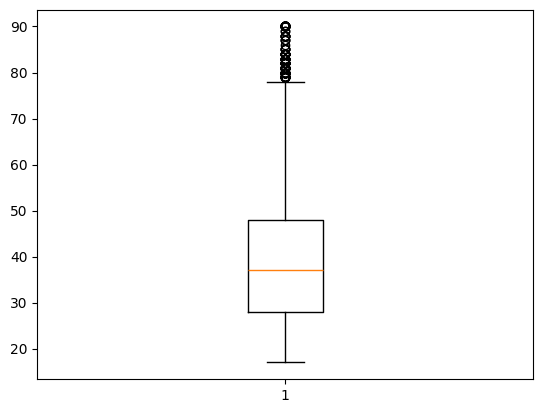

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['age'])
plt.show()

In [ ]:
df=df[(df['age']<=75)&(df['age']>=18)]
plt.boxplot(df['age'])
plt.show()

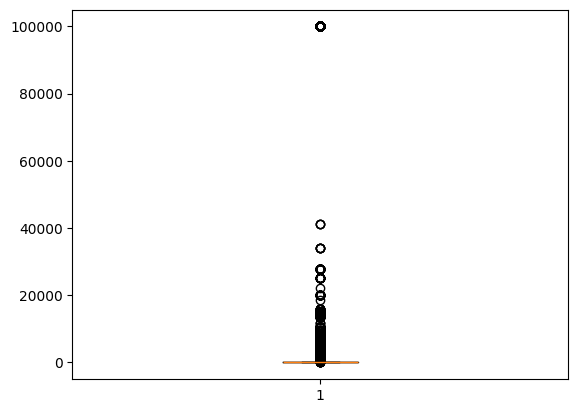

In [ ]:
plt.boxplot(df['capital-gain'])
plt.show()

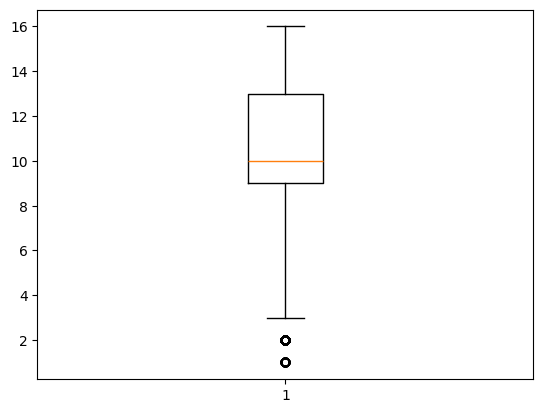

In [ ]:
plt.boxplot(df['educational-num'])
plt.show()

In [ ]:
df=df[(df['educational-num']<=16)&(df['educational-num']>=5)]

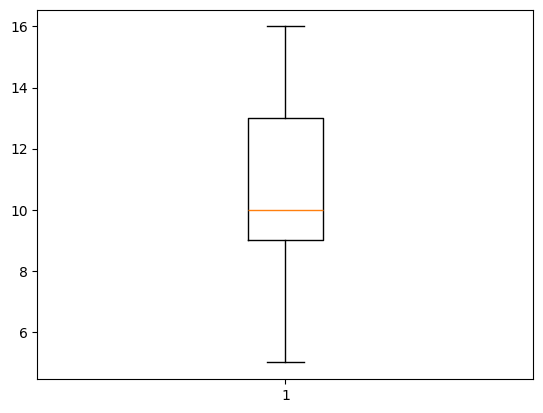

In [ ]:
plt.boxplot(df['educational-num'])
plt.show()

In [ ]:
plt.boxplot(df['hours-per-week'])
plt.show()

In [ ]:
# df['income'] = df['income'].map({'<=50K':0,'>50K':1})

In [ ]:
num_cols=['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_cols=['workclass', 'occupation', 'native-country']
print('Numerical coluns:', num_cols)
print('Categorical columns:', cat_cols)

Numerical coluns: ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical columns: ['workclass', 'occupation', 'native-country']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np # Import numpy
import pandas as pd # Import pandas

# Ensure 'income' column is treated as string and strip whitespace
df['income'] = df['income'].astype(str).str.strip()

# Remove rows where 'income' is '?' - this was done before, but good to ensure
df = df[df['income'] != '?']

# Map income to numerical values - Ensure the mapping is applied correctly
df['income'] = df['income'].map({'<=50K':0,'>50K':1})

#Features and target
x = df.drop('income', axis=1)
y = df['income']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Preprocessing pipeline
preprocessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

#Fit-transform train, transform test
X_train_processed = preprocessing.fit_transform(X_train)
X_test_processed = preprocessing.transform(X_test)

#To capture proper order or feature name for later use in Streanlit app
ohe = preprocessing.named_transformers_['cat']
ohe_feature = ohe.get_feature_names_out(cat_cols)
all_features = np.concatenate([num_cols, ohe_feature])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import joblib
import numpy as np # Import numpy here
import pandas as pd # Import pandas here to use value_counts

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier() # Removed SVM
}

results = []
best_model = None
best_score = -1
best_model_name = None

for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=1) # Explicitly set the positive label
    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})
    if acc > best_score:
        best_score = acc
        best_model = model
        best_model_name = name

results_df = pd.DataFrame(results)
print(results_df)
print(f'\nBest model: {best_model_name} with accuracy {best_score:.2%}')

#Saving preprocessing pipeline and the best model
joblib.dump(preprocessing, 'preprocessing.pkl')
joblib.dump(all_features, 'feature_cols.pkl')
joblib.dump(best_model, 'best_model.pkl')

                 Model  Accuracy  F1 Score
0  Logistic Regression  0.811145  0.538176
1        Decision Tree  0.792173  0.556147
2        Random Forest  0.805291  0.572177
3    Gradient Boosting  0.835646  0.594001
4                  KNN  0.798894  0.553765

Best model: Gradient Boosting with accuracy 83.56%


['best_model.pkl']

In [ ]:
# Convert sparse matrix to dense array before checking for NaNs
if isinstance(X_train_processed, np.ndarray):
    print("NaNs in X_train_processed:", np.isnan(X_train_processed).sum())
else:
    print("NaNs in X_train_processed:", np.isnan(X_train_processed.toarray()).sum())

if isinstance(X_test_processed, np.ndarray):
    print("NaNs in X_test_processed:", np.isnan(X_test_processed).sum())
else:
    print("NaNs in X_test_processed:", np.isnan(X_test_processed.toarray()).sum())

NaNs in X_train_processed: 0
NaNs in X_test_processed: 0


In [ ]:
print(df['income'].value_counts(dropna=False))

income
0    34596
1    11524
Name: count, dtype: int64


In [ ]:
# Check value counts of 'income' to confirm '?'
print(df['income'].value_counts(dropna=False))

# Remove rows where 'income' is '?'
df = df[df['income'] != '?']

# Verify that '?' are removed
print(df['income'].value_counts(dropna=False))

income
0    34596
1    11524
Name: count, dtype: int64
income
0    34596
1    11524
Name: count, dtype: int64


In [ ]:
# Check unique values in income column after removing '?'
print(df[df['income'] != '?']['income'].unique())

[0 1]


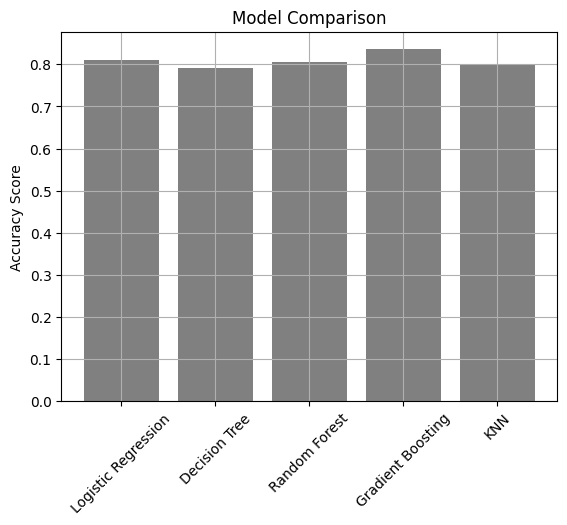

In [ ]:
import matplotlib.pyplot as plt

# Extract model names and accuracy scores from the results list
model_names = [result['Model'] for result in results]
accuracy_scores = [result['Accuracy'] for result in results]

plt.bar(model_names, accuracy_scores, color='grey')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
app_code = """
import streamlit as st
import joblib
import numpy as np
import pandas as pd

model = joblib.load('best_model.pkl')
preprocessor = joblib.load('preprocessing.pkl')
feature_cols = joblib.load('feature_cols.pkl')

st.title('WageWise: Employee Income Prediction')

st.image("/content/f5c3fbb57980fe5d7159f51db672e5ff.jpg", caption="Welcome to the Income Prediction", width=300)

def user_input():
    workclass_opts = ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov',
                      'Local-gov', 'State-gov', 'Without-pay', 'Never-worked', 'Others']
    education_opts = ['Bachelors','Some-college','11th','HS-grad','Prof-school','Assoc-acdm',
                      'Assoc-voc','9th','7th-8th','12th','Masters','1st-4th','10th','Doctorate',
                      '5th-6th','Preschool']
    marital_opts = ['Married-civ-spouse', 'Divorced', 'Never-married',
                    'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']
    occupation_opts = ['Tech-support','Craft-repair','Other-service','Sales',
                       'Exec-managerial','Prof-specialty',
                       'Handlers-cleaners','Machine-op-inspct','Adm-clerical','Farming-fishing',
                       'Transport-moving','Priv-house-serv','Protective-serv','Armed-Forces', 'Others']
    relationship_opts = ['Wife', 'Own-child', 'Husband', 'Not-in-family',
                         'Other-relative', 'Unmarried']
    race_opts = ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black']
    gender_opts = ['Male', 'Female']
    native_opts = ['United-States','Cambodia','England','Puerto-Rico','Canada','Germany',
                   'Outlying-US(Guam-USVI-etc)','India','Japan','Greece','South','China','Cuba',
                   'Iran','Honduras','Philippines','Italy','Poland','Jamaica','Vietnam','Mexico',
                   'Portugal','Ireland','France','Dominican-Republic','Laos','Ecuador','Taiwan',
                   'Haiti','Columbia','Hungary','Guatemala','Nicaragua','Scotland','Thailand',
                   'Yugoslavia','El-Salvador','Trinadad&Tobago','Peru','Hong','Holand-Netherlands', 'Others']

    st.write('### Numerical Inputs')
    age = st.slider("Age", min_value=18, max_value=100, step=1, value=30)
    fnlwgt = st.slider("fnlwgt", min_value=0, value=100000)
    education_num = st.slider("Education Num", min_value=1, max_value=20, value=10)
    capital_gain = st.slider("Capital Gain", min_value=0, value=0)
    capital_loss = st.slider("Capital Loss", min_value=0, value=0)
    hours_per_week = st.slider("Hours Per Week", min_value=1, max_value=100, value=40)

    st.write('### Categorical Inputs')
    workclass = st.selectbox('Workclass', workclass_opts)
    education = st.selectbox('Education', education_opts)
    marital = st.selectbox('Marital Status', marital_opts)
    occupation = st.selectbox('Occupation', occupation_opts)
    relationship = st.selectbox('Relationship', relationship_opts)
    race = st.selectbox('Race', race_opts)
    gender = st.selectbox('Gender', gender_opts)
    native = st.selectbox('Native Country', native_opts)

    row_dict = {
        'age': age,
        'fnlwgt': fnlwgt,
        'educational-num': education_num,
        'capital-gain': capital_gain,
        'capital-loss': capital_loss,
        'hours-per-week': hours_per_week,
        'workclass': workclass,
        'education': education,
        'marital-status': marital,
        'occupation': occupation,
        'relationship': relationship,
        'race': race,
        'gender': gender,
        'native-country': native
    }
    return pd.DataFrame([row_dict])

input_df = user_input()

if st.button("Predict Income Category"):
    inp_prep = preprocessor.transform(input_df)
    pred = model.predict(inp_prep)[0]

    st.image("/content/d56a438d-084c-4aae-9785-01ee49835f16.jpg", caption="Your Prediction", width=300)
    st.success(">50K" if pred==1 else "<=50K")
"""
with open("app.py", "w") as f:
    f.write(app_code)

In [ ]:
import joblib
best_model = joblib.load("best_model.pkl")

In [ ]:
!pip install streamlit pyngrok

In [ ]:
!ngrok authtoken 308nc8yC1bl34Y58nW0qGwEtOPH_4qB5S8e4c5UYNm2pwdDGL

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
import threading

def run_streamlit():
  os.system("streamlit run app.py & npx localtunnel --prt 8501")

streamlit_thread = threading.Thread(target=run_streamlit)
streamlit_thread.start()

In [ ]:
from pyngrok import ngrok
import time

time.sleep(5)

public_url = ngrok.connect(8501)
print("Your Streamlit app is live here:",public_url)

Your Streamlit app is live here: NgrokTunnel: "https://c9f1f6846499.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
print(df['income'].value_counts(dropna=False))

income
0    34596
1    11524
Name: count, dtype: int64


In [ ]:
# Check value counts of 'income' in the original df
print(df['income'].value_counts(dropna=False))

income
0    34596
1    11524
Name: count, dtype: int64
